<a href="https://colab.research.google.com/github/anvitha-sm/turns-classification-arity/blob/main/turns-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox
import geopandas as gpd
from sklearn.preprocessing import StandardScaler

In [4]:
pd.set_option('display.max_columns', None)
ios_data = pd.read_csv("ios_turns.csv")
android_data = pd.read_csv("android_turns.csv")

## Data Exploration

### iOS data

In [5]:
ios_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61094 entries, 0 to 61093
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   init_time                          61094 non-null  float64
 1   eventAction                        61094 non-null  float64
 2   payloadCreation                    61094 non-null  float64
 3   eventStart                         61094 non-null  float64
 4   eventEnd                           61094 non-null  float64
 5   eventType                          61094 non-null  float64
 6   eventSampleSpeed                   61094 non-null  float64
 7   eventDurationSeconds               61094 non-null  float64
 8   eventMilesDriven                   61094 non-null  float64
 9   eventStartLatitude                 61094 non-null  float64
 10  eventStartLongitude                61094 non-null  float64
 11  eventEndLatitude                   61094 non-null  flo

In [6]:
ios_data.describe()

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
count,6.109400e+04,61094.0,61094.0,6.109400e+04,6.109400e+04,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.0,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,60859.000000,61094.000000,61094.000000,6.109100e+04,61094.0
mean,1.720234e+12,1.0,1.0,1.094169e+06,1.099123e+06,4.512440,15.616635,4.954434,0.022619,38.531441,-87.817148,38.531441,-87.817154,1.131011,6.818543,15.287629,16.974019,-1.0,1.178195,1.801076,2.473796,2.005137,2.529723,3.290195,1.474784,2.664718,3.561963,16.155392,12.060006,72.868898,59.401857,154.769521,NaN,1.0
std,8.282511e+09,0.0,0.0,2.183122e+06,2.183208e+06,0.499849,15.057503,3.088469,0.025124,5.932518,22.629689,5.932514,22.629691,0.926085,8.378248,19.745252,14.044510,0.0,0.995345,1.207450,1.776872,1.135880,1.426561,2.285000,1.845171,7.134243,7.284046,11.350997,6.093657,39.745732,40.479495,3347.202429,NaN,0.0
min,1.702584e+12,1.0,1.0,2.952144e+03,4.847230e+03,4.000000,5.001024,0.914496,0.000000,6.968758,-159.761980,6.968711,-159.761500,0.000000,2.000000,-2.236940,-2.236940,-1.0,0.000000,0.005836,0.009053,0.007562,0.009754,0.014992,-0.089241,0.000000,0.000000,0.000000,0.000121,0.000000,0.000137,0.286599,-inf,1.0
25%,1.712613e+12,1.0,1.0,2.249281e+05,2.298995e+05,4.000000,9.713930,2.958125,0.010235,35.235588,-89.412760,35.235524,-89.412432,0.000000,4.740406,8.131329,11.164708,-1.0,0.427068,0.997171,1.493121,1.311046,1.733309,2.279898,0.345133,1.489937,2.119720,9.257651,7.919867,45.924542,26.880174,13.241270,1.676608e+01,1.0
50%,1.721009e+12,1.0,1.0,5.614414e+05,5.665474e+05,5.000000,13.658226,4.655649,0.016879,41.803113,-87.875563,41.803111,-87.875155,2.000000,4.756594,13.314892,15.510978,-1.0,0.993460,1.590590,2.210316,1.842418,2.331026,2.977058,1.212294,2.383681,3.218249,13.744654,12.079066,76.711080,59.295506,24.250653,5.296442e+01,1.0
75%,1.726888e+12,1.0,1.0,1.253427e+06,1.258467e+06,5.000000,18.821297,6.152793,0.027195,42.158978,-82.405621,42.158894,-82.405650,2.000000,7.059539,19.834566,20.721055,-1.0,1.699174,2.334050,3.063695,2.451394,3.009022,3.764590,2.133511,3.515874,4.555012,18.918240,16.067764,90.302572,86.108830,49.206554,3.753227e+02,1.0
max,1.736258e+12,1.0,1.0,6.362140e+07,6.363137e+07,5.000000,1307.922100,24.980251,1.908790,56.830097,25.482054,56.829945,25.482030,2.000000,477.784180,2618.081300,1221.429100,-1.0,15.893914,25.367445,54.141556,29.881191,35.152584,63.657814,275.073360,1625.099200,1625.099200,186.620740,158.511840,726.318100,455.013920,348236.470000,inf,1.0


In [7]:
ios_data.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.713042e+12,1.0,1.0,479553.47,484875.20,4.0,8.553064,5.321719,0.014196,41.966473,-87.76243,41.966328,-87.762570,2.0,5.384603,8.536157,9.551594,-1,0.037169,0.752549,1.175032,0.608627,0.977264,1.619349,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279,1.0
1,1.713042e+12,1.0,1.0,459179.94,464064.80,4.0,9.360758,4.884875,0.012575,41.966442,-87.76127,41.966496,-87.761470,2.0,5.895552,9.034532,10.596797,-1,0.206046,0.810490,1.413861,0.546008,0.846859,1.440432,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140,1.0
2,1.713042e+12,1.0,1.0,448020.16,456677.90,5.0,10.681455,8.657750,0.021795,41.966310,-87.76071,41.966347,-87.761116,2.0,5.291993,11.082506,10.390737,-1,0.798037,1.205643,1.884131,1.024676,1.354444,2.017049,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355,1.0
3,1.713042e+12,1.0,1.0,427011.25,434835.00,5.0,10.399240,7.823751,0.016130,41.966670,-87.75977,41.966540,-87.759950,2.0,4.910240,15.013917,8.630282,-1,0.014152,1.179473,1.692096,0.984073,1.397610,1.996034,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf,1.0
4,1.713042e+12,1.0,1.0,395398.60,402547.22,4.0,8.345368,7.148625,0.017785,41.968548,-87.76115,41.968323,-87.761220,2.0,4.965302,6.963474,9.905923,-1,0.017696,0.601755,1.030918,0.675187,1.029938,1.593058,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477,1.0


### Android data

In [8]:
android_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   init_time                          1287 non-null   float64
 1   eventAction                        1287 non-null   int64  
 2   payloadCreation                    1287 non-null   int64  
 3   eventStart                         1287 non-null   float64
 4   eventEnd                           1287 non-null   float64
 5   eventType                          1287 non-null   int64  
 6   eventSampleSpeed                   1287 non-null   float64
 7   eventDurationSeconds               1287 non-null   float64
 8   eventMilesDriven                   1287 non-null   float64
 9   eventStartLatitude                 1287 non-null   float64
 10  eventStartLongitude                1287 non-null   float64
 11  eventEndLatitude                   1287 non-null   float

In [9]:
android_data.describe()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
count,1.287000e+03,1287.0,1287.0,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.0,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000,1287.0
mean,5.824762e+08,1.0,1.0,7.639296e+05,7.690072e+05,4.523699,14.946815,5.077658,0.020209,41.773899,-86.590954,41.773917,-86.590980,1.160839,11.130416,13.879207,16.552604,-1.0,1.072062,1.571933,2.099919,1.801813,2.251006,2.854002,1.584755,2.153974,2.536275,13.946347,12.876137,75.671681,64.223652,2.888760e+03,inf,1.0
std,5.019584e+08,0.0,0.0,1.106233e+06,1.106494e+06,0.499632,7.874324,2.480706,0.023499,0.932964,3.750509,0.932938,3.750506,0.875494,23.344923,8.793508,8.473080,0.0,0.959199,1.132999,1.535304,1.054915,1.347521,2.084157,0.746833,1.136350,1.432142,6.435707,6.086892,37.372321,33.693333,5.436544e+04,NaN,0.0
min,6.119108e+06,1.0,1.0,4.642188e+03,6.586393e+03,4.000000,5.023032,0.941563,0.000263,38.616080,-90.362114,38.616184,-90.362350,0.000000,0.590333,0.153224,0.022369,-1.0,0.000000,0.007220,0.071752,0.006784,0.009947,0.271653,0.000000,0.252865,0.252865,0.743536,0.000904,1.317169,0.002726,7.547117e-01,2.543214,1.0
25%,1.304819e+08,1.0,1.0,2.324796e+05,2.356247e+05,4.000000,10.071933,3.910750,0.009366,41.799552,-87.871608,41.799582,-87.871630,0.000000,2.805208,7.869826,11.194923,-1.0,0.345431,0.817457,1.214950,1.239227,1.584215,1.989914,1.038555,1.482721,1.706093,9.417365,8.339294,51.685394,37.994030,9.810185e+00,15.596876,1.0
50%,4.284940e+08,1.0,1.0,4.849965e+05,4.895179e+05,5.000000,13.378889,4.673172,0.013994,41.817050,-87.628030,41.817000,-87.628110,1.000000,4.229379,11.787764,15.949382,-1.0,0.954211,1.395912,1.827518,1.750912,2.142905,2.628992,1.543021,2.051562,2.375588,13.873839,13.653311,78.584520,72.812454,1.733225e+01,22.364180,1.0
75%,9.328299e+08,1.0,1.0,8.748381e+05,8.790394e+05,5.000000,17.539583,5.831625,0.020853,41.847730,-87.586555,41.847676,-87.586620,2.000000,10.969387,17.230714,20.399705,-1.0,1.612407,2.102699,2.676041,2.195470,2.674589,3.244440,2.017892,2.596797,2.953982,17.208571,17.275597,88.142812,86.798210,3.806689e+01,38.547116,1.0
max,2.331922e+09,1.0,1.0,8.287698e+06,8.294643e+06,5.000000,54.317898,24.402876,0.165941,44.352550,-75.098540,44.352543,-75.098480,2.000000,293.877560,55.186930,54.742170,-1.0,12.974553,13.458132,20.606392,15.138969,25.500704,46.254982,6.323646,15.997397,17.040415,76.024300,39.642400,334.008360,260.850680,1.706824e+06,inf,1.0


In [10]:
android_data.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.172144e+08,1,1,670340.75,677584.90,4,10.394929,7.244125,0.016991,41.774303,-87.605810,41.774117,-87.60563,2,1.480796,17.323687,6.789408,-1,0.559022,0.791192,1.637599,1.046972,1.510442,1.774518,0.738191,0.800598,0.854956,8.662511,9.521707,67.59688,69.319600,22.941639,20.335337,1
1,1.172144e+08,1,1,250180.31,257678.03,4,9.401910,7.497719,0.016103,41.802270,-87.606285,41.802094,-87.60647,2,1.693853,6.197542,10.101060,-1,0.850605,1.127723,1.371737,1.153392,1.384726,1.655803,0.926223,1.051501,1.147173,9.708605,11.245602,80.07132,84.723694,20.737572,21.819538,1
2,1.122337e+09,1,1,852694.94,860628.70,4,6.750588,7.933750,0.012202,41.822826,-87.871590,41.822826,-87.87141,0,209.183670,2.639589,5.458133,-1,0.038980,0.622810,1.598092,0.704464,1.581334,2.735396,1.197002,1.415529,1.806123,20.356073,2.534807,249.20390,20.211075,18.100092,8.500866,1
3,1.122337e+09,1,1,778673.60,783632.25,5,10.084871,4.958625,0.014104,41.822826,-87.871590,41.822647,-87.87170,0,82.653060,10.737311,6.598973,-1,0.024092,0.946533,4.072164,0.912852,2.278473,4.781333,1.343501,2.203393,4.873099,16.093168,4.245962,162.20609,21.221228,20.195393,14.847904,1
4,1.122337e+09,1,1,711669.90,716628.94,4,5.592350,4.959063,0.009630,41.822876,-87.871560,41.822884,-87.87171,0,40.051018,5.592350,4.898899,-1,0.063652,0.264054,0.687716,0.504615,0.693551,1.063179,2.485116,2.862883,3.406215,29.804018,1.212521,295.70374,6.061072,209.791600,3.592705,1


## Checking for Null Values

### iOS data

In [11]:
ios_data.isnull().sum()

,0
init_time,0
eventAction,0
payloadCreation,0
eventStart,0
eventEnd,0
eventType,0
eventSampleSpeed,0
eventDurationSeconds,0
eventMilesDriven,0
eventStartLatitude,0


*The* only features that have null values for the iOS data are bearingAngleChange and gps_radius. Both of these features are used only when the alignmentState is 0, so below, we find the observations where alignmentState is 0 and one or both of the aforementioned features are null.

In [12]:
ios_data[(ios_data['eventSensorDetectionMthd'] == 0) & (ios_data['bearingAngleChange'].isnull() | ios_data['gps_radius'].isnull())]

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
39031,1.712530e+12,1.0,1.0,85907.766,89863.516,5.0,10.670135,3.95575,0.26103,31.537205,-84.305275,31.533419,-84.30538,0.0,199.9895,0.0,53.35067,-1,0.630801,0.670978,0.735697,1.183661,1.265265,1.34548,0.0,0.0,74.60431,45.309402,0.240965,358.4575,0.962825,145716.94,NaN,1.0


There is only one observation that has a null value that is actually relevant given the alignment state. We choose to simply remove this observation, so our dataset is still large with only real, measured data. Losing this one observation will not meaningfully impact the performance of our model.

In [13]:
print(f"iOS count: {(np.isinf(ios_data['gps_radius']) & (ios_data['eventSensorDetectionMthd'] == 0)).sum()}")

iOS count: 246


In [14]:
rows_to_delete = (
    (ios_data["eventSensorDetectionMthd"] == 0) &
    (
        ios_data["bearingAngleChange"].isna() |
        ios_data["gps_radius"].isna() |
        np.isinf(ios_data["gps_radius"])
    )
)

ios_data = ios_data.loc[~rows_to_delete].copy()
print("Rows dropped:", rows_to_delete.sum())
print("Remaining rows:", len(ios_data))

Rows dropped: 247
Remaining rows: 60847


In [15]:
ios_data.describe()

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
count,6.084700e+04,60847.0,60847.0,6.084700e+04,6.084700e+04,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.0,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60847.000000,60612.000000,60847.000000,60847.000000,6.084500e+04,60847.0
mean,1.720240e+12,1.0,1.0,1.094429e+06,1.099383e+06,4.512219,15.636252,4.954673,0.022635,38.531648,-87.809064,38.531649,-87.809070,1.135602,6.813549,15.302893,16.995407,-1.0,1.179616,1.802162,2.474718,2.005883,2.530376,3.290621,1.478938,2.665573,3.560494,16.152447,12.054367,72.812093,59.380509,152.660071,NaN,1.0
std,8.283261e+09,0.0,0.0,2.185437e+06,2.185523e+06,0.499855,15.082238,3.091980,0.025113,5.932906,22.656291,5.932901,22.656292,0.925149,8.344624,19.779590,14.064080,0.0,0.995783,1.207186,1.775729,1.135429,1.425830,2.280832,1.847291,7.147847,7.292345,11.364993,6.094118,39.721986,40.508672,3301.567735,NaN,0.0
min,1.702584e+12,1.0,1.0,2.952144e+03,4.847230e+03,4.000000,5.001024,0.914496,0.000000,6.968758,-159.761980,6.968711,-159.761500,0.000000,2.000000,-2.236940,-2.236940,-1.0,0.000000,0.005836,0.009053,0.007562,0.009754,0.014992,-0.089241,0.000000,0.000000,0.000000,0.000121,0.000000,0.000137,0.286599,-inf,1.0
25%,1.712616e+12,1.0,1.0,2.248986e+05,2.298596e+05,4.000000,9.729343,2.957875,0.010236,35.235588,-89.415900,35.235560,-89.415847,0.000000,4.740406,8.142008,11.184934,-1.0,0.428457,0.997760,1.493358,1.311664,1.733644,2.280250,0.351695,1.491059,2.117552,9.244995,7.915372,45.835303,26.837792,13.280925,1.669952e+01,1.0
50%,1.721009e+12,1.0,1.0,5.616881e+05,5.667788e+05,5.000000,13.677343,4.658688,0.016899,41.802840,-87.875450,41.802876,-87.875100,2.000000,4.756596,13.330239,15.535548,-1.0,0.994725,1.592083,2.211947,1.843036,2.331977,2.978232,1.216074,2.384807,3.217187,13.732100,12.070844,76.570020,59.203910,24.300392,5.247468e+01,1.0
75%,1.726889e+12,1.0,1.0,1.253504e+06,1.258553e+06,5.000000,18.838289,6.153758,0.027241,42.159016,-82.405510,42.159015,-82.405610,2.000000,7.057937,19.862409,20.751027,-1.0,1.701108,2.335772,3.064389,2.452142,3.009390,3.765797,2.137948,3.515550,4.555188,18.913359,16.060189,90.298396,86.121645,49.300234,3.457810e+02,1.0
max,1.736258e+12,1.0,1.0,6.362140e+07,6.363137e+07,5.000000,1307.922100,24.980251,1.908790,56.830097,25.482054,56.829945,25.482030,2.000000,477.784180,2618.081300,1221.429100,-1.0,15.893914,25.367445,54.141556,29.881191,35.152584,63.657814,275.073360,1625.099200,1625.099200,186.620740,158.511840,726.318100,455.013920,348236.470000,inf,1.0


### Android data

In [16]:
android_data.isnull().sum()

,0
init_time,0
eventAction,0
payloadCreation,0
eventStart,0
eventEnd,0
eventType,0
eventSampleSpeed,0
eventDurationSeconds,0
eventMilesDriven,0
eventStartLatitude,0


In [17]:
print(f"Android count: {(np.isinf(android_data['gps_radius']) & (android_data['eventSensorDetectionMthd'] == 0)).sum()}")

Android count: 0


There are no observations in the Android dataset with null values, so we simply retain the entire dataset

## Visualizations

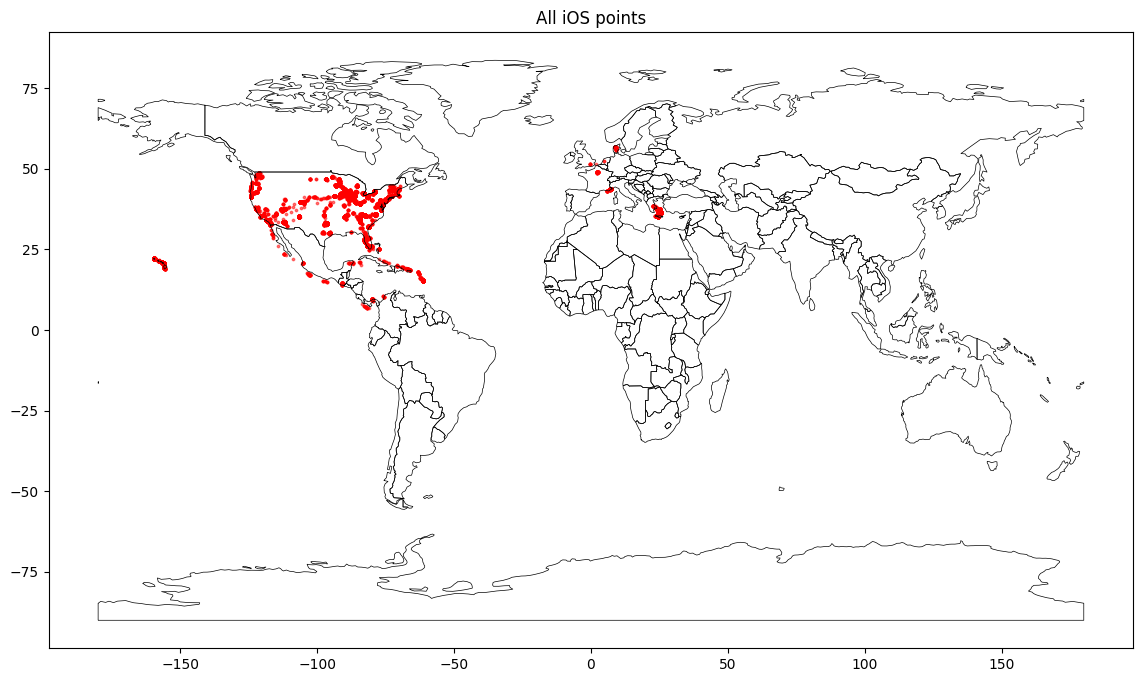

country
United States of America    63236
Greece                        471
France                        439
Denmark                        77
Canada                         51
Guatemala                      44
Mexico                         35
Panama                          9
United Kingdom                  7
Dominican Rep.                  6
Puerto Rico                     4
Netherlands                     2
Colombia                        1
Name: count, dtype: int64
state
Illinois                26162
Florida                  4702
New Jersey               4128
Tennessee                3588
California               3420
Wisconsin                3086
Texas                    2878
North Carolina           1755
New Hampshire            1538
Pennsylvania             1223
Hawaii                   1220
District of Columbia     1194
Georgia                  1055
Michigan                  826
Colorado                  711
Ohio                      557
Iowa                      552
Virginia

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

gdf_points = gpd.GeoDataFrame(
    ios_data,
    geometry=gpd.points_from_xy(ios_data["eventStartLongitude"], ios_data["eventStartLatitude"]),
    crs="EPSG:4326"
)

world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)[["NAME", "geometry"]]
world = world.to_crs(gdf_points.crs)

gdf_points = gpd.sjoin(
    gdf_points, world, how="left", predicate="within",
    lsuffix="left", rsuffix="country"
).rename(columns={"NAME": "country"})

states_url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip"
states = gpd.read_file(states_url)[["NAME", "geometry"]].to_crs(gdf_points.crs)

usa_points = gdf_points[gdf_points["country"] == "United States of America"].copy()
if not usa_points.empty:
    usa_points = usa_points.reset_index(drop=True)
    states = states.reset_index(drop=True)
    usa_points = gpd.sjoin(
        usa_points, states, how="left", predicate="within",
        lsuffix="left", rsuffix="state"
    ).rename(columns={"NAME": "state"})

    # Merge back by coordinates instead of index
    gdf_points = gdf_points.merge(
        usa_points[["eventStartLongitude", "eventStartLatitude", "state"]],
        on=["eventStartLongitude", "eventStartLatitude"],
        how="left"
    )

fig, ax = plt.subplots(figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color="black")
gdf_points.plot(ax=ax, markersize=3, color="red", alpha=0.5)
plt.title("All iOS points")
plt.show()

print(gdf_points["country"].value_counts())
print(
    gdf_points[gdf_points["country"] == "United States of America"]["state"].value_counts()
)


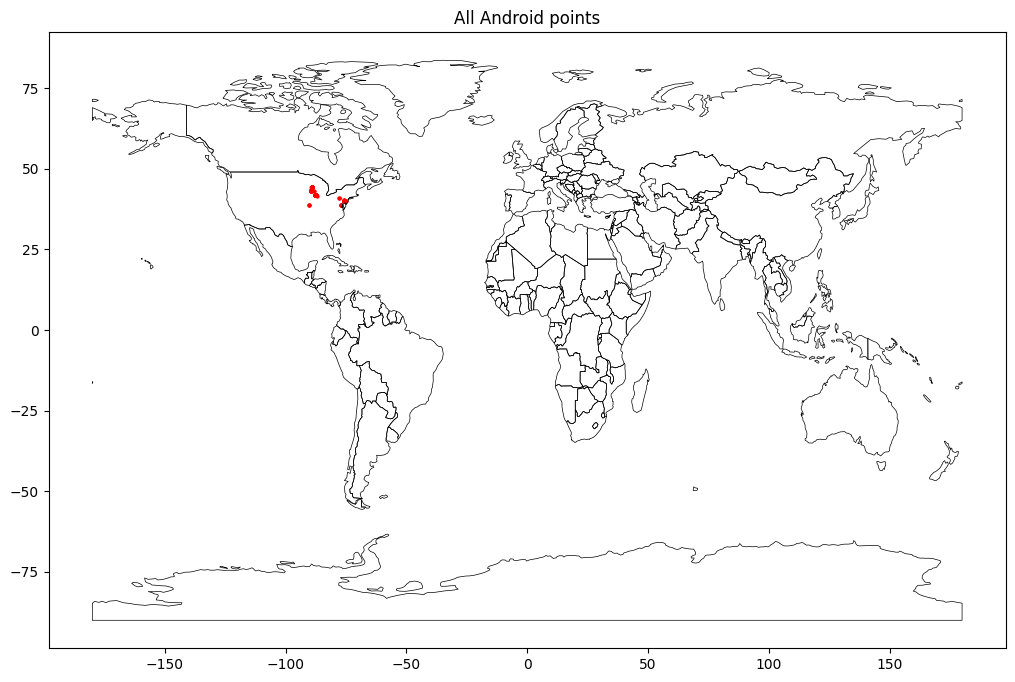

country
United States of America    1319
Name: count, dtype: int64
state
Illinois                1035
Pennsylvania             121
Wisconsin                117
Missouri                  13
District of Columbia       9
Virginia                   9
Indiana                    6
Name: count, dtype: int64


In [19]:
gdf_points = gpd.GeoDataFrame(
    android_data,
    geometry=gpd.points_from_xy(android_data["eventStartLongitude"], android_data["eventStartLatitude"]),
    crs="EPSG:4326"
)

world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)[["NAME", "geometry"]]
world = world.to_crs(gdf_points.crs)

gdf_points = gpd.sjoin(
    gdf_points, world, how="left", predicate="within",
    lsuffix="left", rsuffix="country"
).rename(columns={"NAME": "country"})

states_url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip"
states = gpd.read_file(states_url)[["NAME", "geometry"]].to_crs(gdf_points.crs)

usa_points = gdf_points[gdf_points["country"] == "United States of America"].copy()
if not usa_points.empty:
    usa_points = usa_points.reset_index(drop=True)
    states = states.reset_index(drop=True)
    usa_points = gpd.sjoin(
        usa_points, states, how="left", predicate="within",
        lsuffix="left", rsuffix="state"
    ).rename(columns={"NAME": "state"})

    # Merge back by coordinates instead of index
    gdf_points = gdf_points.merge(
        usa_points[["eventStartLongitude", "eventStartLatitude", "state"]],
        on=["eventStartLongitude", "eventStartLatitude"],
        how="left"
    )

fig, ax = plt.subplots(figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color="black")
gdf_points.plot(ax=ax, markersize=3, color="red", alpha=0.5)
plt.title("All Android points")
plt.show()

print(gdf_points["country"].value_counts())
print(
    gdf_points[gdf_points["country"] == "United States of America"]["state"].value_counts()
)


In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# print("--- Histograms for numerical variables (iOS) ---")
# ios_numeric_cols = ios_data.select_dtypes(include=np.number).columns
# for col in ios_numeric_cols:
#     plt.figure(figsize=(10, 5))
#     sns.histplot(ios_data[col], kde=True, bins=30)
#     plt.title(f'Distribution of {col} in iOS Data')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

# print("\n--- Histograms for numerical variables (Android) ---")
# android_numeric_cols = android_data.select_dtypes(include=np.number).columns
# for col in android_numeric_cols:
#     plt.figure(figsize=(10, 5))
#     sns.histplot(android_data[col], kde=True, bins=30, color='orange')
#     plt.title(f'Distribution of {col} in Android Data')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()


# print("\n--- Boxplots vs. Event Type (iOS) ---")
# for col in ios_numeric_cols:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x='eventType', y=col, data=ios_data)
#     plt.title(f'{col} vs. Event Type in iOS Data')
#     plt.show()

# print("\n--- Boxplots vs. Event Type (Android) ---")
# for col in android_numeric_cols:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x='eventType', y=col, data=android_data, palette='Oranges')
#     plt.title(f'{col} vs. Event Type in Android Data')
#     plt.show()


# print("\n--- Correlation Matrix (iOS) ---")
# plt.figure(figsize=(12, 10))
# ios_corr = ios_data[ios_numeric_cols].corr()
# sns.heatmap(ios_corr, cmap='coolwarm')
# plt.title('Correlation Matrix for iOS Data')
# plt.show()

# print("\n--- Correlation Matrix (Android) ---")
# plt.figure(figsize=(12, 10))
# android_corr = android_data[android_numeric_cols].corr()
# sns.heatmap(android_corr, cmap='YlOrBr')
# plt.title('Correlation Matrix for Android Data')
# plt.show()


# print("\n--- Feature Distribution Comparison (iOS vs. Android) ---")
# for col in ios_numeric_cols:
#     plt.figure(figsize=(10, 5))
#     sns.kdeplot(ios_data[col], label='iOS', fill=True, alpha=0.5)
#     sns.kdeplot(android_data[col], label='Android', fill=True, alpha=0.5)
#     plt.title(f'Distribution of {col}: iOS vs. Android')
#     plt.legend()
#     plt.show()

In [21]:
# for col in numeric_cols:
#     plt.figure(figsize=(8,4))
#     sns.boxplot(x="eventType", y=col, hue="platform", data=ios_data)
#     plt.title(f"{col} vs Event Type (Left/Right Turn) by Platform")
#     plt.show()

In [22]:
# for col in numeric_cols:
#     plt.figure(figsize=(8,4))
#     sns.boxplot(x="eventType", y=col, hue="platform", data=android_data)
#     plt.title(f"{col} vs Event Type (Left/Right Turn) by Platform")
#     plt.show()

In [23]:
# plt.figure(figsize=(10,6))
# sns.heatmap(ios_data[numeric_cols].corr(), annot=True, cmap="coolwarm", center=0)
# plt.title("Correlation Matrix of Numeric Variables")
# plt.show()

In [24]:
# plt.figure(figsize=(10,6))
# sns.heatmap(android_data[numeric_cols].corr(), annot=True, cmap="coolwarm", center=0)
# plt.title("Correlation Matrix of Numeric Variables")
# plt.show()

In [25]:
# cat_cols = ios_data.select_dtypes(include=["object", "category"]).columns
# for col in cat_cols:
#     if col not in ["platform", "eventType"]:  # exclude target columns
#         plt.figure(figsize=(8,4))
#         sns.countplot(x=col, hue="platform", data=ios_data)
#         plt.title(f"Distribution of {col} by Platform (iOS vs Android)")
#         plt.show()

In [26]:
# for col in cat_cols:
#     if col not in ["platform", "eventType"]:  # exclude target columns
#         plt.figure(figsize=(8,4))
#         sns.countplot(x=col, hue="platform", data=android_data)
#         plt.title(f"Distribution of {col} by Platform (iOS vs Android)")
#         plt.show()

## Removing nonsensical observations

Now, we've obtained iOS and Android datasets that do not contain any null values. However, the measured data may have technical issues in it that need to be covered. For example, eventEnd - eventStart must be equal to eventDurationSpeed, within tolerance.

Completing the following sanity checks will ensure that our data is clean and logical to be used for our classification model.
- eventEnd - eventStart = eventDurationSeconds
- eventMilesDriven > 0

In [27]:
ios_data['eventDurationSeconds'] = ios_data['eventEnd'] - ios_data['eventStart']
android_data['eventDurationSeconds'] = android_data['eventEnd'] - android_data['eventStart']

ios_data = ios_data[ios_data['eventMilesDriven'] > 0]
android_data = android_data[android_data['eventMilesDriven'] > 0]

## Preprocessing pipeline

To preprocess our data for our model, we first remove internal features. We apply winsorization on our outliers for each feature. We one-hot encode the eventSensorDetectionMthd feature and select the relevant features for each observation depending on eventSensorDetectionMthd. We augment new features that we believe will be valuable to our model, and finally, we standardize our numerical features.

### Remove internal features

In [28]:
def remove_internal_features(df):
    df.drop(columns=['payloadCreation', 'eventAction', 'validity_mean'], inplace=True)

remove_internal_features(ios_data)
remove_internal_features(android_data)


### Apply winsorization on outliers

In [29]:
import scipy.stats as stats

def winsorize_outliers(df):
  outlier_cols = df.drop(columns=['init_time', 'eventStart', 'eventEnd', 'eventType', 'eventDurationSeconds', 'eventSensorDetectionMthd', 'eventSpeedChange']).columns.tolist()
  for outlier_col in outlier_cols:
    df[outlier_col] = stats.mstats.winsorize(df[outlier_col], limits=[0.01, 0.01])

winsorize_outliers(ios_data)
winsorize_outliers(android_data)

### Selecting relevant features from eventSensorDetectionMthd  
eventSensorDetectionMthd (gyroscope alignment):  
0 = none, gyroscope not aligned, use gps for calculations  
1 = vertical, gyroscope aligned with gravity only  
2 = full, gyroscope fully aligned, most accurate  

In [30]:
def get_relevant_features(df):
    # Print unique values and counts
    print("unique values:", df['eventSensorDetectionMthd'].unique())
    print("unique counts:", df['eventSensorDetectionMthd'].value_counts())

    df['eventSensorDetectionMthd'] = df['eventSensorDetectionMthd'].astype(int)

    # One-hot encode eventSensorDetectionMthd
    df_encoded = pd.get_dummies(df, columns=['eventSensorDetectionMthd'], prefix='eventSensorDetectionMthd', dtype=int)

    # Make sure all one-hot columns exist
    for col in ['eventSensorDetectionMthd_0', 'eventSensorDetectionMthd_1', 'eventSensorDetectionMthd_2']:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Initialize the new columns with NaN
    df_encoded['radius'] = np.nan
    df_encoded['angleChange'] = np.nan
    df_encoded['angularChangePerSecond'] = np.nan
    df_encoded['medianAcc'] = np.nan
    df_encoded['p75Acc'] = np.nan
    df_encoded['p95Acc'] = np.nan

    # Alignment State 0 (use GPS)
    if 'eventSensorDetectionMthd_0' in df_encoded.columns:
        mask0 = df_encoded['eventSensorDetectionMthd_0'] == 1
        if 'gps_radius' in df_encoded.columns:
            df_encoded.loc[mask0, 'radius'] = df_encoded.loc[mask0, 'gps_radius']
        if 'bearingAngleChange' in df_encoded.columns:
            df_encoded.loc[mask0, 'angleChange'] = df_encoded.loc[mask0, 'bearingAngleChange']
        if 'bearing_angular_change_per_second' in df_encoded.columns:
            df_encoded.loc[mask0, 'angularChangePerSecond'] = df_encoded.loc[mask0, 'bearing_angular_change_per_second']
        if 'gpsMedianLateralAccel' in df_encoded.columns:
            df_encoded.loc[mask0, 'medianAcc'] = df_encoded.loc[mask0, 'gpsMedianLateralAccel']
        if 'gpsP75LateralAccel' in df_encoded.columns:
            df_encoded.loc[mask0, 'p75Acc'] = df_encoded.loc[mask0, 'gpsP75LateralAccel']
        if 'gpsP95LateralAccel' in df_encoded.columns:
            df_encoded.loc[mask0, 'p95Acc'] = df_encoded.loc[mask0, 'gpsP95LateralAccel']

    # Alignment State 1 (vertically aligned)
    if 'eventSensorDetectionMthd_1' in df_encoded.columns:
        mask1 = df_encoded['eventSensorDetectionMthd_1'] == 1
        if 'mems_radius' in df_encoded.columns:
            df_encoded.loc[mask1, 'radius'] = df_encoded.loc[mask1, 'mems_radius']
        if 'gyroAngleChange' in df_encoded.columns:
            df_encoded.loc[mask1, 'angleChange'] = df_encoded.loc[mask1, 'gyroAngleChange']
        if 'gyro_angular_change_per_second' in df_encoded.columns:
            df_encoded.loc[mask1, 'angularChangePerSecond'] = df_encoded.loc[mask1, 'gyro_angular_change_per_second']
        if 'memsMedianHorizontalNorm' in df_encoded.columns:
            df_encoded.loc[mask1, 'medianAcc'] = df_encoded.loc[mask1, 'memsMedianHorizontalNorm']
        if 'memsP75HorizontalNorm' in df_encoded.columns:
            df_encoded.loc[mask1, 'p75Acc'] = df_encoded.loc[mask1, 'memsP75HorizontalNorm']
        if 'memsP95HorizontalNorm' in df_encoded.columns:
            df_encoded.loc[mask1, 'p95Acc'] = df_encoded.loc[mask1, 'memsP95HorizontalNorm']

    # Alignment State 2 (fully aligned)
    if 'eventSensorDetectionMthd_2' in df_encoded.columns:
        mask2 = df_encoded['eventSensorDetectionMthd_2'] == 1
        if 'mems_radius' in df_encoded.columns:
            df_encoded.loc[mask2, 'radius'] = df_encoded.loc[mask2, 'mems_radius']
        if 'gyroAngleChange' in df_encoded.columns:
            df_encoded.loc[mask2, 'angleChange'] = df_encoded.loc[mask2, 'gyroAngleChange']
        if 'gyro_angular_change_per_second' in df_encoded.columns:
            df_encoded.loc[mask2, 'angularChangePerSecond'] = df_encoded.loc[mask2, 'gyro_angular_change_per_second']
        if 'memsMedianLateralAccel' in df_encoded.columns:
            df_encoded.loc[mask2, 'medianAcc'] = df_encoded.loc[mask2, 'memsMedianLateralAccel']
        if 'memsP75LateralAccel' in df_encoded.columns:
            df_encoded.loc[mask2, 'p75Acc'] = df_encoded.loc[mask2, 'memsP75LateralAccel']
        if 'memsP95LateralAccel' in df_encoded.columns:
            df_encoded.loc[mask2, 'p95Acc'] = df_encoded.loc[mask2, 'memsP95LateralAccel']

    # Drop original raw columns
    drop_cols = [
        'gps_radius', 'bearingAngleChange', 'bearing_angular_change_per_second',
        'gpsMedianLateralAccel', 'gpsP75LateralAccel', 'gpsP95LateralAccel',
        'mems_radius', 'gyroAngleChange', 'gyro_angular_change_per_second',
        'memsMedianHorizontalNorm', 'memsP75HorizontalNorm', 'memsP95HorizontalNorm',
        'memsMedianLateralAccel', 'memsP75LateralAccel', 'memsP95LateralAccel'
    ]
    df_encoded = df_encoded.drop(columns=[col for col in drop_cols if col in df_encoded.columns])

    return df_encoded

# Apply to datasets
ios_data = get_relevant_features(ios_data)
android_data = get_relevant_features(android_data)

unique values: [2. 0. 1.]
unique counts: eventSensorDetectionMthd
2.0    30532
0.0    22463
1.0     7603
Name: count, dtype: int64
unique values: [2 0 1]
unique counts: eventSensorDetectionMthd
2    613
0    406
1    268
Name: count, dtype: int64


In [31]:
ios_data.head()

,init_time,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,eventSensorDetectionMthd_0,eventSensorDetectionMthd_1,eventSensorDetectionMthd_2,radius,angleChange,angularChangePerSecond,medianAcc,p75Acc,p95Acc
0,1.713042e+12,479553.47,484875.20,4.0,8.553064,5321.73,0.014196,41.966473,-87.76243,41.966328,-87.762570,5.384603,8.536157,9.551594,-1,0,0,1,5.143511,93.844490,17.503620,0.037169,0.752549,1.175032
1,1.713042e+12,459179.94,464064.80,4.0,9.360758,4884.86,0.012575,41.966442,-87.76127,41.966496,-87.761470,5.895552,9.034532,10.596797,-1,0,0,1,21.282076,37.502575,7.615370,0.206046,0.810490,1.413861
2,1.713042e+12,448020.16,456677.90,5.0,10.681455,8657.74,0.021795,41.966310,-87.76071,41.966347,-87.761116,5.291993,11.082506,10.390737,-1,0,0,1,61.868423,58.471710,6.722845,0.798037,1.205643,1.884131
3,1.713042e+12,427011.25,434835.00,5.0,10.399240,7823.75,0.016130,41.966670,-87.75977,41.966540,-87.759950,4.910240,15.013917,8.630282,-1,0,0,1,11.925367,94.482200,12.015339,0.014152,1.179473,1.692096
4,1.713042e+12,395398.60,402547.22,4.0,8.345368,7148.62,0.017785,41.968548,-87.76115,41.968323,-87.761220,4.965302,6.963474,9.905923,-1,0,0,1,8.483684,82.380120,11.460243,0.017696,0.601755,1.030918


In [32]:
ios_data.describe()

,init_time,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,eventSensorDetectionMthd_0,eventSensorDetectionMthd_1,eventSensorDetectionMthd_2,radius,angleChange,angularChangePerSecond,medianAcc,p75Acc,p95Acc
count,6.059800e+04,6.059800e+04,6.059800e+04,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.0,60598.000000,60598.000000,60598.000000,6.059800e+04,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000
mean,1.720236e+12,1.088435e+06,1.093404e+06,4.512162,15.259981,4968.978778,0.022189,38.560182,-87.793740,38.560184,-87.793745,6.539494,14.887146,16.682979,-1.0,0.370689,0.125466,0.503845,2.865684e+03,79.133860,17.010204,1.838103,2.407224,2.925987
std,8.282191e+09,2.168617e+06,2.168714e+06,0.499856,7.552257,3089.945040,0.019159,5.720977,22.540768,5.720976,22.540771,4.242849,8.977791,7.780844,0.0,0.482993,0.331250,0.499989,5.678532e+05,32.878785,9.986045,1.164967,1.239666,1.316637
min,1.702584e+12,2.952144e+03,4.847230e+03,4.000000,5.281773,914.495000,0.001924,20.768421,-156.614780,20.768486,-156.614720,2.009788,0.794423,3.387664,-1.0,0.000000,0.000000,0.000000,2.235194e+00,25.000967,6.500058,-0.000000,0.064018,0.064018
25%,1.712613e+12,2.245670e+05,2.297046e+05,4.000000,9.723476,2961.000000,0.010303,35.235588,-89.412743,35.235574,-89.412170,4.740404,8.128386,11.182250,-1.0,0.000000,0.000000,0.000000,1.149955e+01,56.555038,10.602181,1.010093,1.517862,2.003855
50%,1.721009e+12,5.605490e+05,5.657512e+05,5.000000,13.663363,4666.320000,0.016974,41.802755,-87.875277,41.802780,-87.874915,4.756543,13.308719,15.529084,-1.0,0.000000,0.000000,1.000000,2.025432e+01,82.149538,14.583530,1.630075,2.199676,2.762506
75%,1.726888e+12,1.251120e+06,1.256626e+06,5.000000,18.824628,6156.437500,0.027295,42.159010,-82.405275,42.158979,-82.405530,7.040786,19.833749,20.731283,-1.0,1.000000,0.000000,1.000000,3.787168e+01,90.842190,19.002475,2.369719,3.020862,3.625179
max,1.736258e+12,6.362140e+07,6.363137e+07,5.000000,42.100243,24980.300000,0.116797,46.860603,24.023504,46.860733,24.023605,32.004833,43.776096,42.939762,-1.0,1.000000,1.000000,1.000000,1.382421e+08,205.392940,55.812572,6.502870,7.956239,10.135865


In [33]:
android_data.describe()

,init_time,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,eventSensorDetectionMthd_0,eventSensorDetectionMthd_1,eventSensorDetectionMthd_2,radius,angleChange,angularChangePerSecond,medianAcc,p75Acc,p95Acc
count,1.287000e+03,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.0,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,5.824762e+08,7.639296e+05,7.690072e+05,4.523699,14.914602,5077.657657,0.020137,41.773974,-86.592580,41.773991,-86.592608,10.267851,13.855629,16.520800,-1.0,0.315462,0.208236,0.476301,24.814887,79.722199,15.307991,1.517696,2.043097,2.552221
std,5.019584e+08,1.106233e+06,1.106494e+06,0.499632,7.736325,2480.706436,0.023060,0.932614,3.744844,0.932589,3.744842,16.050054,8.653196,8.308672,0.0,0.464880,0.406205,0.499632,22.832583,32.921362,5.483314,0.758902,1.010026,1.217214
min,6.119108e+06,4.642188e+03,6.586393e+03,4.000000,5.132190,941.560000,0.002053,38.630665,-90.250570,38.630570,-90.250730,0.897213,2.472805,1.498750,-1.0,0.000000,0.000000,0.000000,1.838268,25.006205,6.501664,0.006285,0.176893,0.347666
25%,1.304819e+08,2.324796e+05,2.356247e+05,4.000000,10.071933,3910.755000,0.009366,41.799552,-87.871608,41.799582,-87.871630,2.805208,7.869826,11.194923,-1.0,0.000000,0.000000,0.000000,10.597746,61.967804,11.028503,0.971697,1.354250,1.745108
50%,4.284940e+08,4.849965e+05,4.895179e+05,5.000000,13.378889,4673.170000,0.013994,41.817050,-87.628030,41.817000,-87.628110,4.229379,11.787764,15.949382,-1.0,0.000000,0.000000,0.000000,17.197498,83.537950,15.333608,1.469054,1.951537,2.441401
75%,9.328299e+08,8.748381e+05,8.790394e+05,5.000000,17.539583,5831.630000,0.020853,41.847730,-87.586555,41.847676,-87.586620,10.969387,17.230714,20.399705,-1.0,1.000000,0.000000,1.000000,30.609147,90.751710,18.755451,2.001733,2.508451,3.101693
max,2.331922e+09,8.287698e+06,8.294643e+06,5.000000,44.722656,24402.850000,0.145488,44.349700,-75.620360,44.349697,-75.620360,108.673470,46.221073,45.678383,-1.0,1.000000,1.000000,1.000000,164.370880,233.504560,34.972107,4.922246,6.527181,8.182224


### Feature augmentation

In [34]:
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 3956
    return c * r

In [35]:
def augment_features(df):
    df_augmented = df.copy()
    df_augmented['changeLatitude'] = df_augmented["eventEndLatitude"] - df_augmented["eventStartLatitude"]
    df_augmented['changeLongitude'] = df_augmented["eventEndLongitude"] - df_augmented["eventStartLongitude"]
    df_augmented['eventSpeedChange'] = df_augmented['eventEndSpeed'] - df_augmented['eventStartSpeed']
    haversine_dist = haversine(df_augmented['eventStartLatitude'], df_augmented['eventStartLongitude'],
                               df_augmented['eventEndLatitude'], df_augmented['eventEndLongitude'])
    df_augmented['straightness'] = np.divide(haversine_dist, df_augmented['eventMilesDriven'],
                                           out=np.zeros_like(haversine_dist), where=df_augmented['eventMilesDriven']!=0)
    df_augmented['normalizedRadius'] = np.divide(df_augmented['radius'], df_augmented['eventMilesDriven'],
                                                     out=np.zeros_like(df_augmented['radius']), where=df_augmented['eventMilesDriven']!=0)
    df_augmented['averageAcceleration'] = np.divide(df_augmented['eventSpeedChange'], df_augmented['eventDurationSeconds'],
                                              out=np.zeros_like(df_augmented['eventSpeedChange']), where=df_augmented['eventDurationSeconds']!=0)
    df_augmented['accRange'] = df_augmented['p95Acc'] - df_augmented['medianAcc']
    df_augmented['speedRatio'] = np.divide(df_augmented['eventEndSpeed'], df_augmented['eventStartSpeed'],
                                         out=np.zeros_like(df_augmented['eventEndSpeed']), where=df_augmented['eventStartSpeed']!=0)
    df_augmented['angularDisplacementPerMile'] = np.divide(df_augmented['angleChange'], df_augmented['eventMilesDriven'],
                                                                     out=np.zeros_like(df_augmented['angleChange']), where=df_augmented['eventMilesDriven']!=0)
    df_augmented['turnIntensity'] = np.divide(df_augmented['angularChangePerSecond'], df_augmented['eventSampleSpeed'],
                                                      out=np.zeros_like(df_augmented['angularChangePerSecond']), where=df_augmented['eventSampleSpeed']!=0)
    df_augmented['normalizedTurnIntensity'] = np.divide(df_augmented['turnIntensity'], df_augmented['radius'],
                                                                 out=np.zeros_like(df_augmented['turnIntensity']), where=df_augmented['radius']!=0)

    event_timestamp_seconds = df_augmented['init_time'] + df_augmented['eventStart'] / 1000
    event_datetime = pd.to_datetime(event_timestamp_seconds, unit='ms')
    df_augmented['hour'] = event_datetime.dt.hour
    df_augmented['day'] = event_datetime.dt.dayofweek
    df_augmented['month'] = event_datetime.dt.month
    is_weekday = df_augmented['day'] < 5
    is_morning_rush = (df_augmented['hour'] >= 7) & (df_augmented['hour'] < 10)
    is_evening_rush = (df_augmented['hour'] >= 16) & (df_augmented['hour'] < 19)
    df_augmented['is_rush_hour'] = (is_weekday & (is_morning_rush | is_evening_rush)).astype(int)
    return df_augmented

In [36]:
ios_data = augment_features(ios_data)
android_data = augment_features(android_data)

In [37]:
ios_data.head()

,init_time,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,eventSensorDetectionMthd_0,eventSensorDetectionMthd_1,eventSensorDetectionMthd_2,radius,angleChange,angularChangePerSecond,medianAcc,p75Acc,p95Acc,changeLatitude,changeLongitude,straightness,normalizedRadius,averageAcceleration,accRange,speedRatio,angularDisplacementPerMile,turnIntensity,normalizedTurnIntensity,hour,day,month,is_rush_hour
0,1.713042e+12,479553.47,484875.20,4.0,8.553064,5321.73,0.014196,41.966473,-87.76243,41.966328,-87.762570,5.384603,8.536157,9.551594,1.015437,0,0,1,5.143511,93.844490,17.503620,0.037169,0.752549,1.175032,-0.000145,-0.000140,0.868126,362.310211,0.000191,1.137863,1.118957,6610.429518,2.046474,0.397875,21,5,4,0
1,1.713042e+12,459179.94,464064.80,4.0,9.360758,4884.86,0.012575,41.966442,-87.76127,41.966496,-87.761470,5.895552,9.034532,10.596797,1.562265,0,0,1,21.282076,37.502575,7.615370,0.206046,0.810490,1.413861,0.000054,-0.000200,0.868664,1692.399363,0.000320,1.207815,1.172922,2982.290546,0.813542,0.038227,21,5,4,0
2,1.713042e+12,448020.16,456677.90,5.0,10.681455,8657.74,0.021795,41.966310,-87.76071,41.966347,-87.761116,5.291993,11.082506,10.390737,-0.691769,0,0,1,61.868423,58.471710,6.722845,0.798037,1.205643,1.884131,0.000037,-0.000406,0.963499,2838.700964,-0.000080,1.086093,0.937580,2682.850015,0.629394,0.010173,21,5,4,0
3,1.713042e+12,427011.25,434835.00,5.0,10.399240,7823.75,0.016130,41.966670,-87.75977,41.966540,-87.759950,4.910240,15.013917,8.630282,-6.383635,0,0,1,11.925367,94.482200,12.015339,0.014152,1.179473,1.692096,-0.000130,-0.000180,0.798662,739.325965,-0.000816,1.677943,0.574819,5857.525701,1.155405,0.096886,21,5,4,0
4,1.713042e+12,395398.60,402547.22,4.0,8.345368,7148.62,0.017785,41.968548,-87.76115,41.968323,-87.761220,4.965302,6.963474,9.905923,2.942449,0,0,1,8.483684,82.380120,11.460243,0.017696,0.601755,1.030918,-0.000225,-0.000070,0.896542,477.002361,0.000412,1.013222,1.422555,4631.892439,1.373246,0.161869,21,5,4,0


### Feature fusion

In [38]:
# not working, will add these features later

### One Hot Encoding

In [39]:
def one_hot_encode(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df.drop(columns=[col], inplace=True)
    return df

categorical_cols = [] # eventSensorDetectionMthd already encoded
ios_data = one_hot_encode(ios_data, categorical_cols)
android_data = one_hot_encode(android_data, categorical_cols)
categorical_cols += ["eventSensorDetectionMthd"]

In [40]:
ios_encoded_cols = [col for col in ios_data.columns if any(prefix in col for prefix in categorical_cols)]
android_encoded_cols = [col for col in android_data.columns if any(prefix in col for prefix in categorical_cols)]
print(ios_data[ios_encoded_cols].head())
print(android_data[android_encoded_cols].head())

   eventSensorDetectionMthd_0  eventSensorDetectionMthd_1  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   eventSensorDetectionMthd_2  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
   eventSensorDetectionMthd_0  eventSensorDetectionMthd_1  \
0                           0                           0   
1                           0                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   eventSensorDetectionMthd_2  
0                           1  
1         

## Standardize

### First I'll take out one hot encoded features and time identifiers

In [41]:
# ios_onehot_cols = []
# for col in ios_data.columns:
#     unique_vals = ios_data[col].dropna().unique()
#     if len(unique_vals) == 2 and set(unique_vals).issubset({0, 1, 0.0, 1.0}):
#         ios_onehot_cols.append(col)

### Create column that standardizes column values that are not onehot encoded or define time

In [42]:
# ios_numerical_cols = ios_data.select_dtypes(include=[np.number]).columns.tolist()
# time_cols = ['init_time', 'eventStart', 'eventEnd']
# ios_cols_to_standardize = [col for col in ios_numerical_cols if col not in ios_onehot_cols and col not in time_cols]
# ios_cols_to_standardize

In [43]:
# print("total columns: {}".format(len(ios_data.columns)))
# print("one-hot columns (skipping): {}".format(len(ios_onehot_cols)))
# print("iOS standardizing: {}".format(len(ios_cols_to_standardize)))

### This will use standardized scaler

In [44]:
# # Replace inf values with NaN
# ios_data[ios_cols_to_standardize] = ios_data[ios_cols_to_standardize].replace([np.inf, -np.inf], np.nan)
# # Replace NaN values with columns mean
# ios_data[ios_cols_to_standardize] = ios_data[ios_cols_to_standardize].fillna(
#     ios_data[ios_cols_to_standardize].mean()
# )

# ios_scaler = StandardScaler()
# ios_data[ios_cols_to_standardize] = ios_scaler.fit_transform(ios_data[ios_cols_to_standardize])

# print("Complete!")

# Repeat for Android

In [45]:
# android_onehot_cols = []
# for col in android_data.columns:
#     unique_vals = android_data[col].dropna().unique()
#     if len(unique_vals) == 2 and set(unique_vals).issubset({0, 1, 0.0, 1.0}):
#         android_onehot_cols.append(col)
# android_numerical_cols = android_data.select_dtypes(include=[np.number]).columns.tolist()
# android_cols_to_standardize = [col for col in android_numerical_cols if col not in android_onehot_cols and col not in time_cols]

# print("total columns: {}".format(len(android_data.columns)))
# print("one-hot columns (skipping): {}".format(len(android_onehot_cols)))
# print("android standardizing: {}".format(len(android_cols_to_standardize)))

# android_data[android_cols_to_standardize] = android_data[android_cols_to_standardize].replace([np.inf, -np.inf], np.nan)
# android_data[android_cols_to_standardize] = android_data[android_cols_to_standardize].fillna(
#     android_data[android_cols_to_standardize].mean()
# )

# android_scaler = StandardScaler()
# android_data[android_cols_to_standardize] = android_scaler.fit_transform(android_data[android_cols_to_standardize])

# print("Complete!")

### Full pipeline

In [46]:
from sklearn.preprocessing import StandardScaler

def standardize_features(df):
    df_processed = df.copy()
    time_cols = ['init_time', 'eventStart', 'eventEnd', 'eventType']
    onehot_cols = []
    for col in df_processed.columns:
        unique_vals = df_processed[col].dropna().unique()
        if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1, 0.0, 1.0}):
            onehot_cols.append(col)

    print(onehot_cols)
    cols_to_exclude = time_cols + onehot_cols
    numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
    print(numerical_cols)
    cols_to_standardize = [col for col in numerical_cols if col not in cols_to_exclude]
    print(cols_to_standardize)

    scaler = StandardScaler()
    df_processed[cols_to_standardize] = scaler.fit_transform(df_processed[cols_to_standardize])
    return df_processed

In [47]:
ios_data = standardize_features(ios_data)
android_data = standardize_features(android_data)

['eventSensorDetectionMthd_0', 'eventSensorDetectionMthd_1', 'eventSensorDetectionMthd_2', 'is_rush_hour']
['init_time', 'eventStart', 'eventEnd', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventStartLatitude', 'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'eventSpeedChange', 'eventSensorDetectionMthd_0', 'eventSensorDetectionMthd_1', 'eventSensorDetectionMthd_2', 'radius', 'angleChange', 'angularChangePerSecond', 'medianAcc', 'p75Acc', 'p95Acc', 'changeLatitude', 'changeLongitude', 'straightness', 'normalizedRadius', 'averageAcceleration', 'accRange', 'speedRatio', 'angularDisplacementPerMile', 'turnIntensity', 'normalizedTurnIntensity', 'hour', 'day', 'month', 'is_rush_hour']
['eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventStartLatitude', 'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude', 'eventGPSSignalStrength', 'eventStartSpeed', 'e

In [48]:
ios_data.head()

,init_time,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,eventSensorDetectionMthd_0,eventSensorDetectionMthd_1,eventSensorDetectionMthd_2,radius,angleChange,angularChangePerSecond,medianAcc,p75Acc,p95Acc,changeLatitude,changeLongitude,straightness,normalizedRadius,averageAcceleration,accRange,speedRatio,angularDisplacementPerMile,turnIntensity,normalizedTurnIntensity,hour,day,month,is_rush_hour
0,1.713042e+12,479553.47,484875.20,4.0,-0.888075,0.114162,-0.417197,0.595409,0.001389,0.595383,0.001383,-0.272199,-0.707417,-0.916539,-0.117547,0,0,1,-0.005038,0.447424,0.049411,-1.545923,-1.334785,-1.329880,-0.513350,-0.374669,-0.041486,-0.004533,-0.217618,0.056099,-0.228292,0.114577,0.508777,1.200866,0.829552,0.858029,-0.822781,0
1,1.713042e+12,459179.94,464064.80,4.0,-0.781127,-0.027224,-0.501825,0.595403,0.001441,0.595412,0.001432,-0.151772,-0.651904,-0.782207,-0.035181,0,0,1,-0.005009,-1.266216,-0.940804,-1.400959,-1.288046,-1.148485,0.181342,-0.540391,-0.038486,-0.004498,-0.142207,0.134615,-0.207399,-0.519671,-0.554708,-0.460259,0.829552,0.858029,-0.822781,0
2,1.713042e+12,448020.16,456677.90,5.0,-0.606251,1.193805,-0.020602,0.595380,0.001465,0.595386,0.001448,-0.294027,-0.423787,-0.808690,-0.374695,0,0,1,-0.004938,-0.628439,-1.030182,-0.892793,-0.969285,-0.791308,0.121996,-1.109372,0.491008,-0.004468,-0.375861,-0.002010,-0.298518,-0.572017,-0.713548,-0.589831,0.829552,0.858029,-0.822781,0
3,1.713042e+12,427011.25,434835.00,5.0,-0.643620,0.923898,-0.316270,0.595443,0.001507,0.595420,0.001499,-0.384003,0.014121,-1.034947,-1.232032,0,0,1,-0.005026,0.466820,-0.500189,-1.565680,-0.990396,-0.937162,-0.460986,-0.485150,-0.429325,-0.004523,-0.806104,0.662304,-0.438970,-0.017041,-0.259828,-0.189325,0.829552,0.858029,-0.822781,0
4,1.713042e+12,395398.60,402547.22,4.0,-0.915577,0.705404,-0.229867,0.595771,0.001446,0.595732,0.001443,-0.371025,-0.882593,-0.871000,0.172709,0,0,1,-0.005032,0.098735,-0.555776,-1.562638,-1.456427,-1.439337,-0.792623,-0.181326,0.117170,-0.004530,-0.088549,-0.083803,-0.110746,-0.231298,-0.071926,0.110814,0.829552,0.858029,-0.822781,0


In [49]:
android_data.head()

,init_time,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,eventSensorDetectionMthd_0,eventSensorDetectionMthd_1,eventSensorDetectionMthd_2,radius,angleChange,angularChangePerSecond,medianAcc,p75Acc,p95Acc,changeLatitude,changeLongitude,straightness,normalizedRadius,averageAcceleration,accRange,speedRatio,angularDisplacementPerMile,turnIntensity,normalizedTurnIntensity,hour,day,month,is_rush_hour
0,1.172144e+08,670340.75,677584.90,4,-0.584442,0.873676,-0.136486,0.000353,-0.270672,0.000135,-0.270616,-0.547691,0.400939,-1.171688,-2.259723,0,0,1,-0.082075,-0.316106,-1.055663,-1.263728,-1.239960,-0.751699,-0.799674,0.510970,0.158122,-0.179231,-1.359929,0.046615,-1.161522,-0.415708,-0.481120,-0.500363,-0.815069,0.208630,1,1
1,1.172144e+08,250180.31,257678.03,4,-0.712849,0.975933,-0.174997,0.030352,-0.270799,0.030146,-0.270841,-0.534411,-0.885345,-0.772956,0.212003,0,0,1,-0.178644,0.151982,-0.741152,-0.879363,-0.906640,-0.970202,-0.760280,-0.385192,0.360207,-0.210702,-0.068540,-0.543273,0.222000,-0.242811,-0.180947,-0.414414,-0.815069,0.208630,1,1
2,1.122337e+09,852694.94,860628.70,4,-1.055693,1.151774,-0.344221,0.052402,-0.341672,0.052385,-0.341616,6.133554,-1.296677,-1.331978,0.026257,1,0,0,-0.714784,4.673019,0.920984,-0.422740,-0.621580,-0.613194,-0.066951,0.510970,-1.158761,-0.508655,-0.176679,-0.450164,0.711452,1.787580,1.768771,1.023877,1.289373,-1.487201,1,0
3,1.122337e+09,778673.60,783632.25,5,-0.624535,-0.047992,-0.261711,0.052402,-0.341672,0.052193,-0.341694,4.511720,-0.360506,-1.194617,-1.164749,1,0,0,-0.436694,2.506456,0.143250,-0.229624,0.158767,1.907454,-0.772098,-0.201049,0.398785,-0.329188,-0.954747,2.640288,-0.912667,0.670214,0.247367,-0.173298,1.289373,-1.487201,1,0
4,1.122337e+09,711669.90,716628.94,4,-1.205466,-0.047835,-0.455840,0.052455,-0.341664,0.052447,-0.341696,1.856364,-0.955311,-1.399311,-0.574990,1,0,0,-0.901274,4.673019,2.644690,1.275259,0.811964,0.701870,-0.035436,-0.299258,-0.819958,-0.637626,-0.500438,-0.120028,-0.620506,2.535789,4.248552,5.386016,1.289373,-1.487201,1,0


In [50]:
X_ios = ios_data.iloc[:, 4:]
X_ios.head()

,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,eventSensorDetectionMthd_0,eventSensorDetectionMthd_1,eventSensorDetectionMthd_2,radius,angleChange,angularChangePerSecond,medianAcc,p75Acc,p95Acc,changeLatitude,changeLongitude,straightness,normalizedRadius,averageAcceleration,accRange,speedRatio,angularDisplacementPerMile,turnIntensity,normalizedTurnIntensity,hour,day,month,is_rush_hour
0,-0.888075,0.114162,-0.417197,0.595409,0.001389,0.595383,0.001383,-0.272199,-0.707417,-0.916539,-0.117547,0,0,1,-0.005038,0.447424,0.049411,-1.545923,-1.334785,-1.329880,-0.513350,-0.374669,-0.041486,-0.004533,-0.217618,0.056099,-0.228292,0.114577,0.508777,1.200866,0.829552,0.858029,-0.822781,0
1,-0.781127,-0.027224,-0.501825,0.595403,0.001441,0.595412,0.001432,-0.151772,-0.651904,-0.782207,-0.035181,0,0,1,-0.005009,-1.266216,-0.940804,-1.400959,-1.288046,-1.148485,0.181342,-0.540391,-0.038486,-0.004498,-0.142207,0.134615,-0.207399,-0.519671,-0.554708,-0.460259,0.829552,0.858029,-0.822781,0
2,-0.606251,1.193805,-0.020602,0.595380,0.001465,0.595386,0.001448,-0.294027,-0.423787,-0.808690,-0.374695,0,0,1,-0.004938,-0.628439,-1.030182,-0.892793,-0.969285,-0.791308,0.121996,-1.109372,0.491008,-0.004468,-0.375861,-0.002010,-0.298518,-0.572017,-0.713548,-0.589831,0.829552,0.858029,-0.822781,0
3,-0.643620,0.923898,-0.316270,0.595443,0.001507,0.595420,0.001499,-0.384003,0.014121,-1.034947,-1.232032,0,0,1,-0.005026,0.466820,-0.500189,-1.565680,-0.990396,-0.937162,-0.460986,-0.485150,-0.429325,-0.004523,-0.806104,0.662304,-0.438970,-0.017041,-0.259828,-0.189325,0.829552,0.858029,-0.822781,0
4,-0.915577,0.705404,-0.229867,0.595771,0.001446,0.595732,0.001443,-0.371025,-0.882593,-0.871000,0.172709,0,0,1,-0.005032,0.098735,-0.555776,-1.562638,-1.456427,-1.439337,-0.792623,-0.181326,0.117170,-0.004530,-0.088549,-0.083803,-0.110746,-0.231298,-0.071926,0.110814,0.829552,0.858029,-0.822781,0


In [51]:
X_android = android_data.iloc[:, 4:]
X_android.head()

,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,eventStartLongitude,eventEndLatitude,eventEndLongitude,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventSpeedChange,eventSensorDetectionMthd_0,eventSensorDetectionMthd_1,eventSensorDetectionMthd_2,radius,angleChange,angularChangePerSecond,medianAcc,p75Acc,p95Acc,changeLatitude,changeLongitude,straightness,normalizedRadius,averageAcceleration,accRange,speedRatio,angularDisplacementPerMile,turnIntensity,normalizedTurnIntensity,hour,day,month,is_rush_hour
0,-0.584442,0.873676,-0.136486,0.000353,-0.270672,0.000135,-0.270616,-0.547691,0.400939,-1.171688,-2.259723,0,0,1,-0.082075,-0.316106,-1.055663,-1.263728,-1.239960,-0.751699,-0.799674,0.510970,0.158122,-0.179231,-1.359929,0.046615,-1.161522,-0.415708,-0.481120,-0.500363,-0.815069,0.208630,1,1
1,-0.712849,0.975933,-0.174997,0.030352,-0.270799,0.030146,-0.270841,-0.534411,-0.885345,-0.772956,0.212003,0,0,1,-0.178644,0.151982,-0.741152,-0.879363,-0.906640,-0.970202,-0.760280,-0.385192,0.360207,-0.210702,-0.068540,-0.543273,0.222000,-0.242811,-0.180947,-0.414414,-0.815069,0.208630,1,1
2,-1.055693,1.151774,-0.344221,0.052402,-0.341672,0.052385,-0.341616,6.133554,-1.296677,-1.331978,0.026257,1,0,0,-0.714784,4.673019,0.920984,-0.422740,-0.621580,-0.613194,-0.066951,0.510970,-1.158761,-0.508655,-0.176679,-0.450164,0.711452,1.787580,1.768771,1.023877,1.289373,-1.487201,1,0
3,-0.624535,-0.047992,-0.261711,0.052402,-0.341672,0.052193,-0.341694,4.511720,-0.360506,-1.194617,-1.164749,1,0,0,-0.436694,2.506456,0.143250,-0.229624,0.158767,1.907454,-0.772098,-0.201049,0.398785,-0.329188,-0.954747,2.640288,-0.912667,0.670214,0.247367,-0.173298,1.289373,-1.487201,1,0
4,-1.205466,-0.047835,-0.455840,0.052455,-0.341664,0.052447,-0.341696,1.856364,-0.955311,-1.399311,-0.574990,1,0,0,-0.901274,4.673019,2.644690,1.275259,0.811964,0.701870,-0.035436,-0.299258,-0.819958,-0.637626,-0.500438,-0.120028,-0.620506,2.535789,4.248552,5.386016,1.289373,-1.487201,1,0


In [52]:
left_ios_data = ios_data[ios_data['eventType'] == 4].copy()
X_ios_left = left_ios_data.iloc[:, 4:]
right_ios_data = ios_data[ios_data['eventType'] == 5].copy()
X_ios_right = right_ios_data.iloc[:, 4:]

left_android_data = android_data[android_data['eventType'] == 4].copy()
X_android_left = left_android_data.iloc[:, 4:]
right_android_data = android_data[android_data['eventType'] == 5].copy()
X_android_right = right_android_data.iloc[:, 4:]

combined_data = pd.concat([ios_data, android_data], ignore_index=True)
X_combined = combined_data.iloc[:, 4:]
left_combined_data = combined_data[combined_data['eventType'] == 4].copy()
X_combined_left = left_combined_data.iloc[:, 4:]
right_combined_data = combined_data[combined_data['eventType'] == 5].copy()
X_combined_right = right_combined_data.iloc[:, 4:]

# Clustering
Now, we will be clustering for different types of turns, including left turns, right turns, for ios and android, as well as both combined for left and right.

In [53]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import hdbscan

def cluster_grid_search(estimator_class, param_grid, X, random_state=42):
    if hasattr(X, "values"):
        X_arr = X.values
    else:
        X_arr = np.asarray(X)

    keys, values = zip(*param_grid.items())
    param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    best_score = -1
    best_model, best_params, best_labels = None, None, None

    for params in param_combinations:
        if "random_state" in estimator_class().get_params().keys():
            params["random_state"] = random_state

        try:
            model = estimator_class(**params)
            model.fit(X_arr)

            if hasattr(model, "labels_"):  # HDBSCAN-like
                labels = model.labels_
            else:  # GMM-like
                labels = model.predict(X_arr)

            unique_labels = set(labels)
            if len(unique_labels - {-1}) < 2:
                continue
            mask = labels != -1 if -1 in labels else np.ones(len(labels), dtype=bool)
            if np.sum(mask) < 2:
                continue

            score = calinski_harabasz_score(X_arr[mask], labels[mask])

            if score > best_score:
                best_score = score
                best_model = model
                best_params = params
                best_labels = labels
        except Exception as e:
            print(f"Failed for params {params}: {e}")
            continue

    if best_labels is not None:
        n_features = X_arr.shape[1]

        if n_features == 2:
            plt.figure(figsize=(6, 5))
            plt.scatter(X_arr[:, 0], X_arr[:, 1], c=best_labels, cmap="tab10", s=30, alpha=0.7)
            plt.title(f"Best Clustering\n{best_params}\nCH={best_score:.3f}")
            plt.show()

        elif n_features == 3:
            fig = plt.figure(figsize=(7, 6))
            ax = fig.add_subplot(111, projection="3d")
            ax.scatter(X_arr[:, 0], X_arr[:, 1], X_arr[:, 2], c=best_labels, cmap="tab10", s=30, alpha=0.7)
            ax.set_title(f"Best Clustering\n{best_params}\nCH={best_score:.3f}")
            plt.show()

        else:
            pca = PCA(n_components=3)
            X_pca = pca.fit_transform(X_arr)
            fig = plt.figure(figsize=(7, 6))
            ax = fig.add_subplot(111, projection="3d")
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=best_labels, cmap="tab10", s=30, alpha=0.7)
            ax.set_title(f"Best Clustering (PCA 3D)\n{best_params}\nCH={best_score:.3f}")
            plt.show()

    return best_model, best_params, best_labels, best_score


/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


--- Running Analysis for: Left Android ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

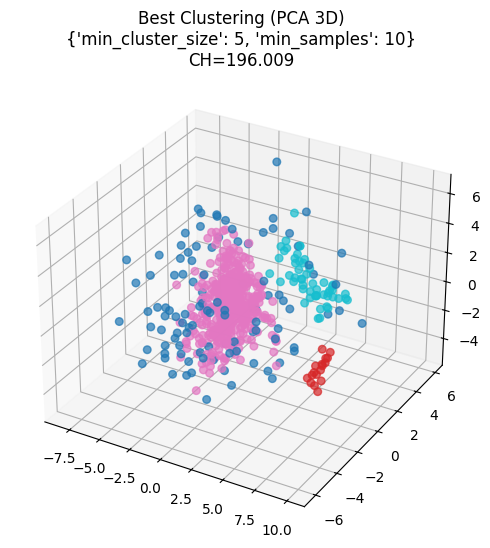

Best HDBSCAN Params for Left Android: {'min_cluster_size': 5, 'min_samples': 10}
Best CH Score for Left Android: 196.00857707565112

--- Running Analysis for: Right Android ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

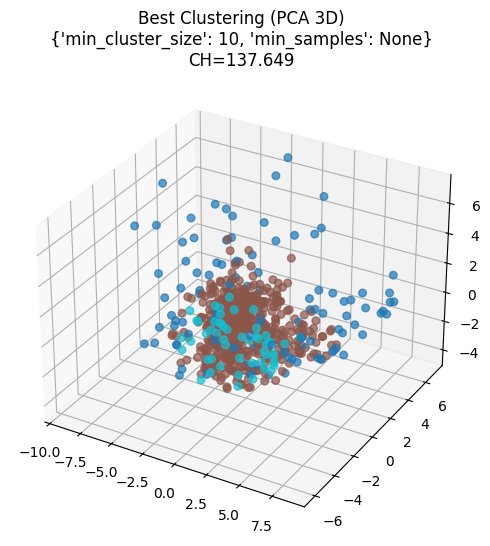

Best HDBSCAN Params for Right Android: {'min_cluster_size': 10, 'min_samples': None}
Best CH Score for Right Android: 137.64859109723238

--- Running Analysis for: Android ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

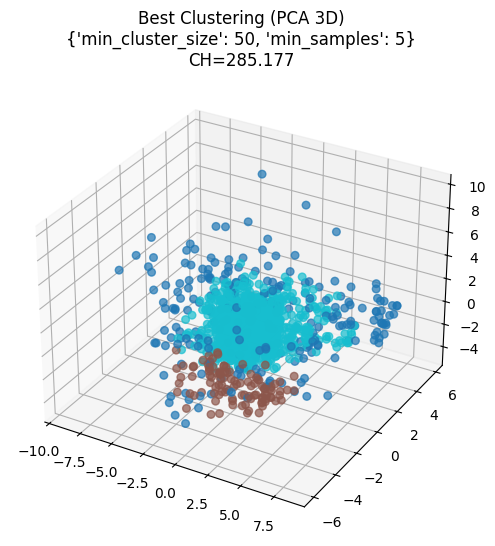

Best HDBSCAN Params for Android: {'min_cluster_size': 50, 'min_samples': 5}
Best CH Score for Android: 285.17721408694786

--- Running Analysis for: Left iOS ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

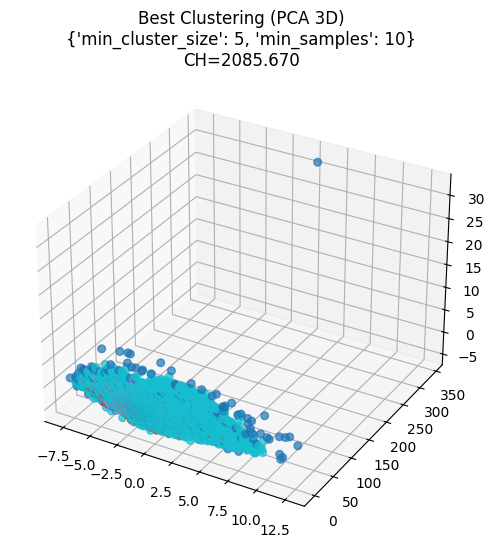

Best HDBSCAN Params for Left iOS: {'min_cluster_size': 5, 'min_samples': 10}
Best CH Score for Left iOS: 2085.6700459848

--- Running Analysis for: Right iOS ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

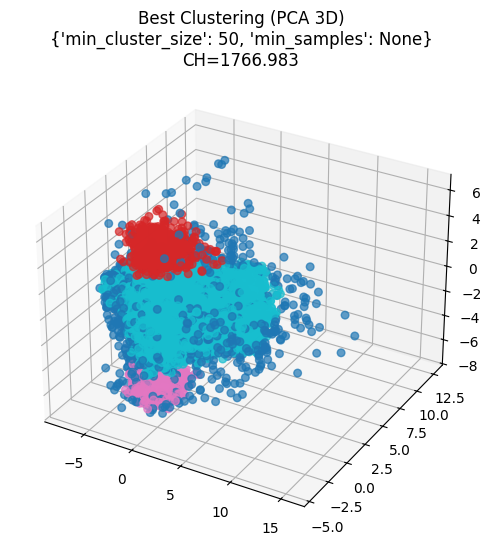

Best HDBSCAN Params for Right iOS: {'min_cluster_size': 50, 'min_samples': None}
Best CH Score for Right iOS: 1766.9831340457279

--- Running Analysis for: iOS ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

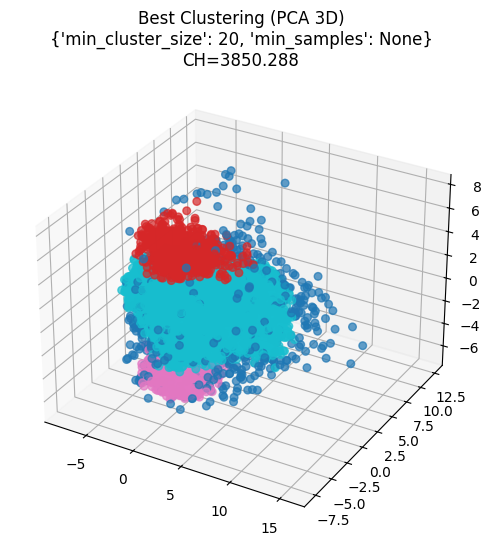

Best HDBSCAN Params for iOS: {'min_cluster_size': 20, 'min_samples': None}
Best CH Score for iOS: 3850.2879660726785

--- Running Analysis for: Left Combined ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

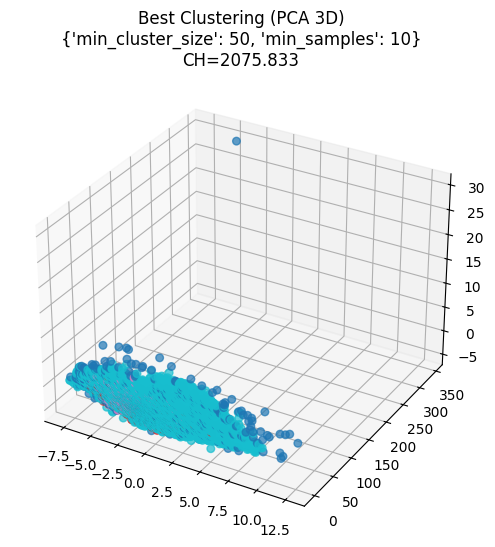

Best HDBSCAN Params for Left Combined: {'min_cluster_size': 50, 'min_samples': 10}
Best CH Score for Left Combined: 2075.8326467890574

--- Running Analysis for: Right Combined ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

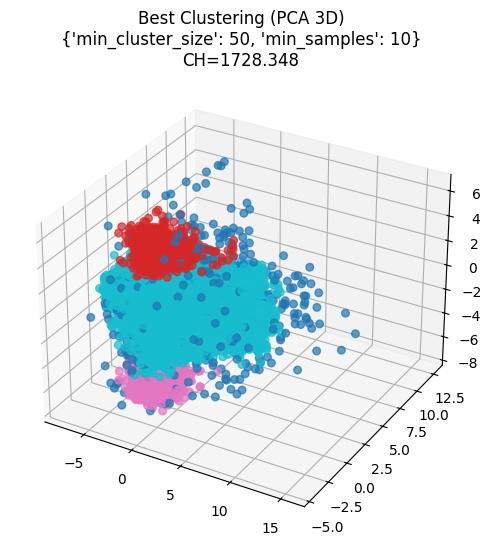

Best HDBSCAN Params for Right Combined: {'min_cluster_size': 50, 'min_samples': 10}
Best CH Score for Right Combined: 1728.3476453726119

--- Running Analysis for: Combined ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

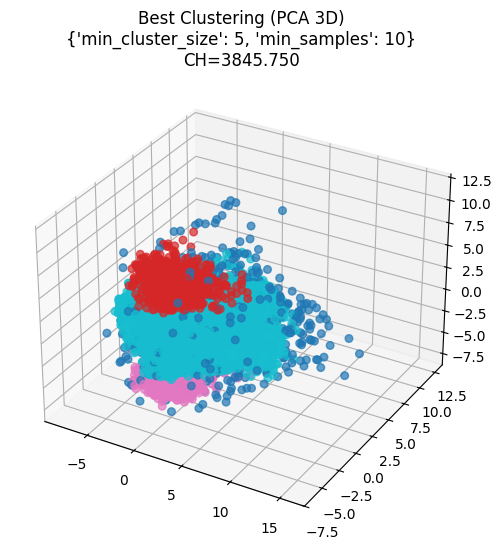

Best HDBSCAN Params for Combined: {'min_cluster_size': 5, 'min_samples': 10}
Best CH Score for Combined: 3845.7500379386247



In [54]:
from sklearn.decomposition import PCA
import hdbscan

param_grid = {
    "min_cluster_size": [5, 10, 20, 50],
    "min_samples": [None, 5, 10]
}

datasets = {
    "Left Android": X_android_left,
    "Right Android": X_android_right,
    "Android": X_android,
    "Left iOS": X_ios_left,
    "Right iOS": X_ios_right,
    "iOS": X_ios,
    "Left Combined": X_combined_left,
    "Right Combined": X_combined_right,
    "Combined": X_combined
}

results = {}

for name, data in datasets.items():
    print(f"--- Running Analysis for: {name} ---")

    if not data.empty:
        X_pca = PCA(n_components=8).fit_transform(data)

        best_model, best_params, best_labels, best_score = cluster_grid_search(
            hdbscan.HDBSCAN,
            param_grid,
            X_pca
        )

        results[name] = {
            'best_params': best_params,
            'best_score': best_score
        }

        print(f"Best HDBSCAN Params for {name}: {best_params}")
        print(f"Best CH Score for {name}: {best_score}\n")
    else:
        print(f"Skipping {name} because it is empty.\n")

--- Running KMeans Analysis for: Left Android ---


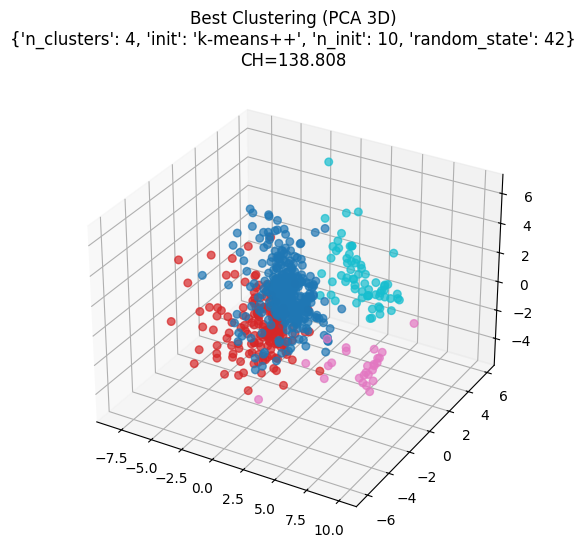

Best KMeans Params for Left Android: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 10, 'random_state': 42}
Best CH Score for Left Android: 138.8079687154326

--- Running KMeans Analysis for: Right Android ---


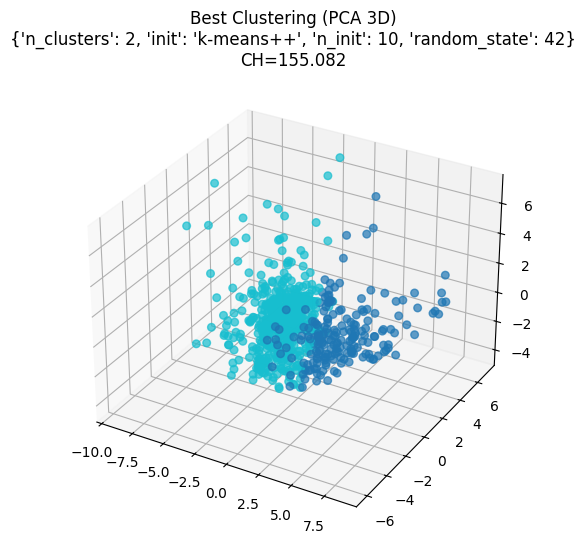

Best KMeans Params for Right Android: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'random_state': 42}
Best CH Score for Right Android: 155.08246982243108

--- Running KMeans Analysis for: Android ---


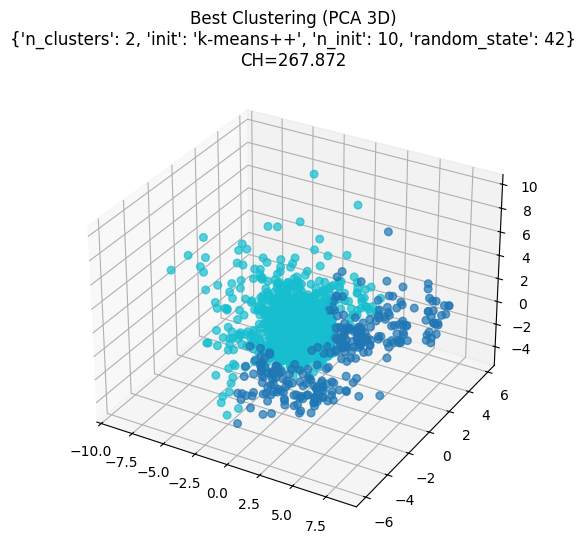

Best KMeans Params for Android: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'random_state': 42}
Best CH Score for Android: 267.8715544223824

--- Running KMeans Analysis for: Left iOS ---


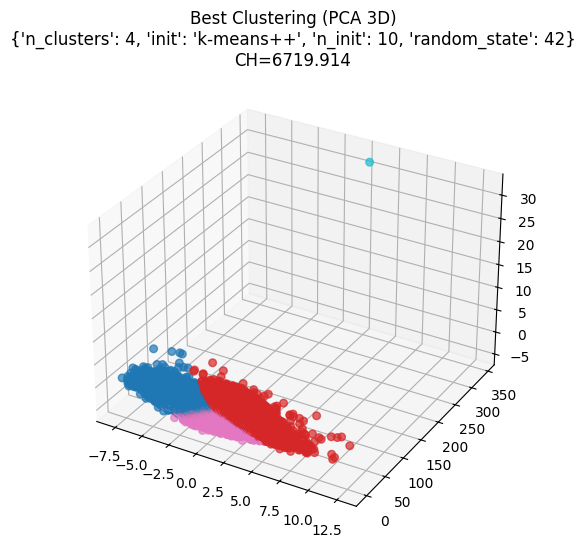

Best KMeans Params for Left iOS: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 10, 'random_state': 42}
Best CH Score for Left iOS: 6719.913676149832

--- Running KMeans Analysis for: Right iOS ---


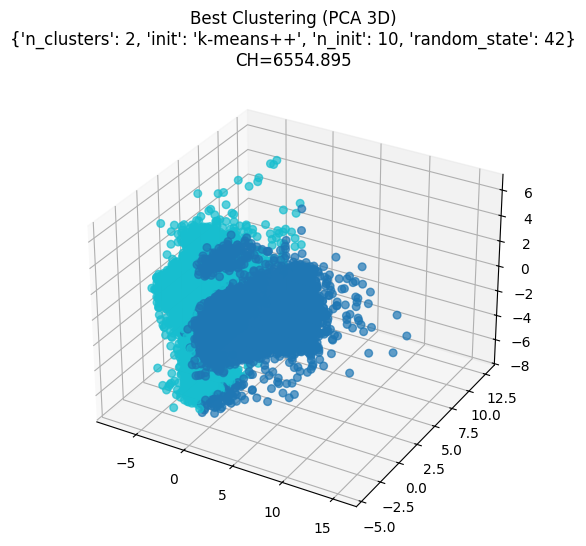

Best KMeans Params for Right iOS: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'random_state': 42}
Best CH Score for Right iOS: 6554.894840849599

--- Running KMeans Analysis for: iOS ---


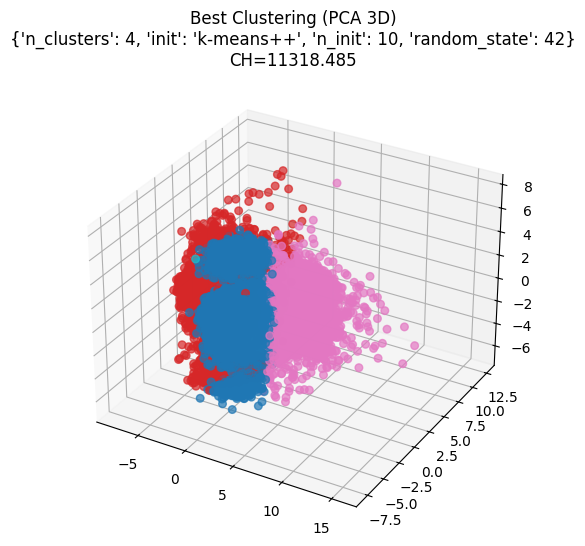

Best KMeans Params for iOS: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 10, 'random_state': 42}
Best CH Score for iOS: 11318.485244847681

--- Running KMeans Analysis for: Left Combined ---


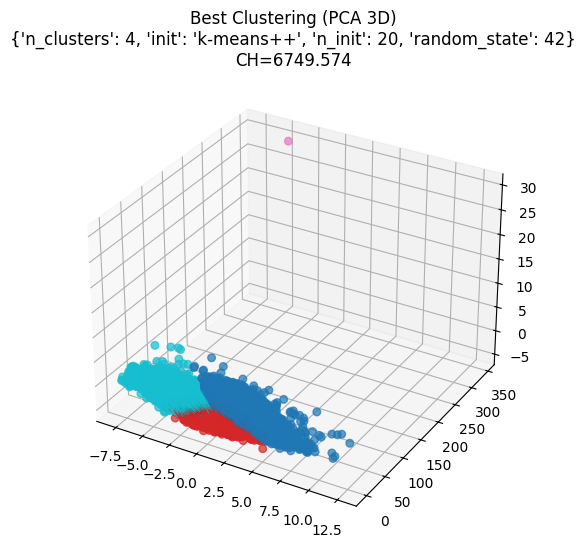

Best KMeans Params for Left Combined: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 20, 'random_state': 42}
Best CH Score for Left Combined: 6749.574393125177

--- Running KMeans Analysis for: Right Combined ---


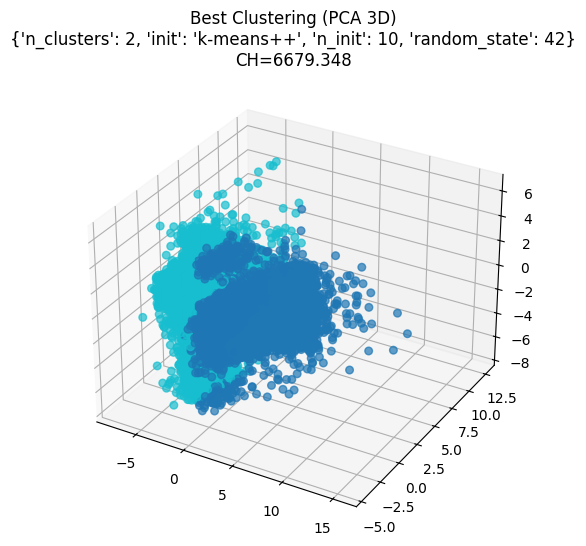

Best KMeans Params for Right Combined: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'random_state': 42}
Best CH Score for Right Combined: 6679.348441695782

--- Running KMeans Analysis for: Combined ---


In [ ]:
from sklearn.cluster import KMeans

param_grid = {
    "n_clusters": [2, 3, 4, 5, 6],
    "init": ["k-means++", "random"],
    "n_init": [10, 20]
}

results_kmeans = {}

for name, data in datasets.items():
    print(f"--- Running KMeans Analysis for: {name} ---")

    if not data.empty:
        X_pca = PCA(n_components=8).fit_transform(data)

        best_model, best_params, best_labels, best_score = cluster_grid_search(
            KMeans,
            param_grid,
            X_pca
        )

        results_kmeans[name] = {
            'best_params': best_params,
            'best_score': best_score
        }

        print(f"Best KMeans Params for {name}: {best_params}")
        print(f"Best CH Score for {name}: {best_score}\n")
    else:
        print(f"Skipping {name} because it is empty.\n")